# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

#### New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. 

This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

A well established restaurant chain for Bulgarian traditional food is looking for an opportunity to expand its business in North America. As an employee it is my job to analyze big cities like New York, San Francisco, Toronto etc. and propose a suitable location for the restaurant. In order to accomplish the task I need to gather the following information:
1.	Gather information about New York City boroughs and neighborhoods.
2.	List the nearby venues like restaurants, coffee shops, shopping centers business centers.
3.	Determine most preferred food.
4.	Pinpoint the most suitable place to open a restaurant in Manhattan and Brooklyn.
 

If a business wants to stay competitive many other thigs must be takin into consideration like population, demographics, markets and access to ingredients, competition etc.

#### The developed can be used to recommend a suitable location for opening a restaurant in any city around the world. If a business wants to stay competitive many other thigs must be takin into consideration like population, demographics, markets and access to ingredients, competition etc. Once the analysis is done it can be presented to the management for the purpose of making the decision whether it is suitable to expand the business.

## Data <a name="data"></a>

#### New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. The data for the 5 boroughs and 306 neighborhoods is available at https://geo.nyu.edu/catalog/nyu_2451_34572.
#### A data for the local market is also needed in order to analyze the availability of needed food and ingredients.  In the below link Farmer market data is given:
https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

#### A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.
#### For further analysis we need to gather information about Now York population, demographics and cuisine. That data can be scraped from various websitelike wikipedia:
https://en.wikipedia.org/wiki/New_York_City 

https://en.wikipedia.org/wiki/Portal:New_York_City 

https://en.wikipedia.org/wiki/Cuisine_of_New_York_City 

https://en.wikipedia.org/wiki/Economy_of_New_York_City 

https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City

### Downloading and creating dataframe with New York neighborhoods

In [75]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from PIL import Image # converting images into arrays


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


#### Downloading the data.

In [76]:
!wget -q -O 'NY.json' https://cocl.us/new_york_dataset
print('Data downloaded')

Data downloaded


#### Load and explore the data.

In [77]:
with open('NY.json') as json_data:
    NY_data = json.load(json_data)

In [78]:
#NY_data

#### The relevent data is in the features key.

In [79]:
neighborhoods_data = NY_data['features']
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [80]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough,
                                         'Neighborhood':neighborhood_name,
                                         'Latitude':neighborhood_lat,
                                         'Longitude':neighborhood_lon}, ignore_index=True)
    

In [81]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Checking the validity of the results.

In [82]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Get the New York city coordinates using geopy.

In [83]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="get_loc")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of NY city are {} and {}'.format(latitude, longitude))

Coordinates of NY city are 40.7308619 and -73.9871558


#### Create a map of New York.

In [84]:
map_NewYork = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)
    
map_NewYork
    

#### Farmer markets dafaframe. The dataset can be downloaded from the following link:
https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [85]:
#First we get the link to the file download which is https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD
!wget -q -O 'market.csv' https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD
print('File downloaded')

File downloaded


In [86]:
markets_NY = pd.read_csv('market.csv')
markets_NY.head()

,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
2,1 Centre Street,Farmers Markets and Food Boxes,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.713028,-74.003753,Open year-round,NaN,NaN,NaN,NaN,NaN,2:00 pm - 6:00 pm,NaN,NaN,NaN,True,False,True,https://www.grownyc.org/greenmarketco/foodbox,"(40.7130276, -74.0037529)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"


In [87]:
markets_NY['Service Type'].value_counts()

Farmers Markets    144
Food Boxes          17
Name: Service Type, dtype: int64

In [88]:
#filter the dataframe to get only the farmer markets
markets_NY_filtered = markets_NY[markets_NY['Service Type'] == 'Farmers Markets'].copy()
markets_NY_filtered['Borough'] = markets_NY_filtered['Borough'].map(lambda x: x.strip())
print(markets_NY_filtered.shape)
markets_NY_filtered.head()

(144, 24)


,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


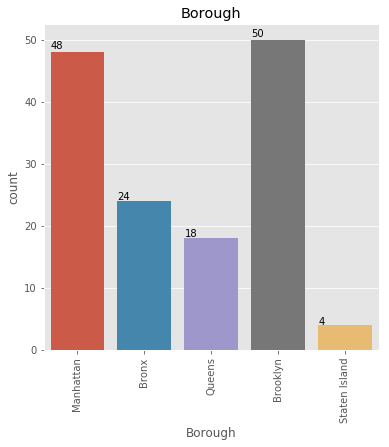

In [89]:
#Plot the number of markets for every Borough
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.countplot(x='Borough', data = markets_NY_filtered)
ax.set_title('Borough')
for t in ax.patches:
    if(np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split('T')[0] for t in ax.get_xticklabels()])
        
plt.xticks(rotation=90)
plt.show()

#### Create a map using folium with the markets superimposed on top.

In [90]:
markets_NY_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, FacilityName, borough in zip(markets_NY_filtered['Latitude'],
                                           markets_NY_filtered['Longitude'], markets_NY_filtered['FacilityName'], markets_NY_filtered['Borough']):
    label = '{}, {}'.format(FacilityName, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(markets_NY_map)

markets_NY_map

### Demographics 

#### The data is available no wikipedia (https://en.wikipedia.org/wiki/Demographics_of_New_York_City)

In [91]:
from bs4 import BeautifulSoup
import requests
import csv
import numpy as np
import pandas as pd

source = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(source,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = ['Borough', 'County', 'Population', 'GDP($)', 'GDP(per capita)', 'square miles', 'square km', 'persons/sq. miles', 'person/sq. km.']

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)



In [92]:
print(rows)
new_rows = rows[3:]

df_pop = pd.DataFrame(new_rows, columns = headers)
df_pop.head(10)

[[], [], [], ['The Bronx\n', '\n  Bronx\n', '1,471,160\n', '28.787\n', '19,570\n', '42.10\n', '109.04\n', '34,653\n', '13,231\n'], ['Brooklyn\n', '\n  Kings\n', '2,648,771\n', '63.303\n', '23,900\n', '70.82\n', '183.42\n', '37,137\n', '14,649\n'], ['Manhattan\n', '\n  New York\n', '1,664,727\n', '629.682\n', '378,250\n', '22.83\n', '59.13\n', '72,033\n', '27,826\n'], ['Queens\n', '\n   Queens\n', '2,358,582\n', '73.842\n', '31,310\n', '108.53\n', '281.09\n', '21,460\n', '8,354\n'], ['Staten Island\n', '\n   Richmond\n', '479,458\n', '11.249\n', '23,460\n', '58.37\n', '151.18\n', '8,112\n', '3,132\n'], ['City of New York', '8,622,698', '806.863', '93,574', '302.64', '783.83', '28,188', '10,947\n'], ['State of New York', '19,849,399', '1,547.116', '78,354', '47,214', '122,284', '416.4', '159\n'], ['Sources: [3] and see individual borough articles\n']]


,Borough,County,Population,GDP($),GDP(per capita),square miles,square km,persons/sq. miles,person/sq. km.
0,The Bronx\n,\n Bronx\n,"1,471,160\n",28.787\n,"19,570\n",42.10\n,109.04\n,"34,653\n","13,231\n"
1,Brooklyn\n,\n Kings\n,"2,648,771\n",63.303\n,"23,900\n",70.82\n,183.42\n,"37,137\n","14,649\n"
2,Manhattan\n,\n New York\n,"1,664,727\n",629.682\n,"378,250\n",22.83\n,59.13\n,"72,033\n","27,826\n"
3,Queens\n,\n Queens\n,"2,358,582\n",73.842\n,"31,310\n",108.53\n,281.09\n,"21,460\n","8,354\n"
4,Staten Island\n,\n Richmond\n,"479,458\n",11.249\n,"23,460\n",58.37\n,151.18\n,"8,112\n","3,132\n"
5,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188","10,947\n",None
6,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,159\n,None
7,Sources: [3] and see individual borough articl...,None,None,None,None,None,None,None,None


In [93]:
#drop the last row
df_pop.drop(df_pop.index[7], inplace=True)
df_pop.head(10)

,Borough,County,Population,GDP($),GDP(per capita),square miles,square km,persons/sq. miles,person/sq. km.
0,The Bronx\n,\n Bronx\n,"1,471,160\n",28.787\n,"19,570\n",42.10\n,109.04\n,"34,653\n","13,231\n"
1,Brooklyn\n,\n Kings\n,"2,648,771\n",63.303\n,"23,900\n",70.82\n,183.42\n,"37,137\n","14,649\n"
2,Manhattan\n,\n New York\n,"1,664,727\n",629.682\n,"378,250\n",22.83\n,59.13\n,"72,033\n","27,826\n"
3,Queens\n,\n Queens\n,"2,358,582\n",73.842\n,"31,310\n",108.53\n,281.09\n,"21,460\n","8,354\n"
4,Staten Island\n,\n Richmond\n,"479,458\n",11.249\n,"23,460\n",58.37\n,151.18\n,"8,112\n","3,132\n"
5,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188","10,947\n",None
6,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,159\n,None


In [94]:
#shift the last two rows by one column
df_pop.loc[5:,['Borough', 'County','Population','GDP($)','GDP(per capita)','square miles','square km','persons/sq. miles','person/sq. km.']] =\
df_pop.loc[5:,['Borough', 'County','Population','GDP($)','GDP(per capita)','square miles','square km','persons/sq. miles','person/sq. km.']].shift(1,axis=1)
df_pop.head(10)

,Borough,County,Population,GDP($),GDP(per capita),square miles,square km,persons/sq. miles,person/sq. km.
0,The Bronx\n,\n Bronx\n,"1,471,160\n",28.787\n,"19,570\n",42.10\n,109.04\n,"34,653\n","13,231\n"
1,Brooklyn\n,\n Kings\n,"2,648,771\n",63.303\n,"23,900\n",70.82\n,183.42\n,"37,137\n","14,649\n"
2,Manhattan\n,\n New York\n,"1,664,727\n",629.682\n,"378,250\n",22.83\n,59.13\n,"72,033\n","27,826\n"
3,Queens\n,\n Queens\n,"2,358,582\n",73.842\n,"31,310\n",108.53\n,281.09\n,"21,460\n","8,354\n"
4,Staten Island\n,\n Richmond\n,"479,458\n",11.249\n,"23,460\n",58.37\n,151.18\n,"8,112\n","3,132\n"
5,NaN,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188","10,947\n"
6,NaN,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,159\n


In [95]:
# Delete the newline sign '\n'.
df_pop['Borough'] = df_pop['Borough'].replace(to_replace='\n', value='', regex=True)
df_pop['County'] = df_pop['County'].replace(to_replace='\n', value='', regex=True)
df_pop['Population'] = df_pop['Population'].replace(to_replace='\n', value='', regex=True)
df_pop['GDP($)'] = df_pop['GDP($)'].replace(to_replace='\n', value='', regex=True)
df_pop['GDP(per capita)'] = df_pop['GDP(per capita)'].replace(to_replace='\n', value='', regex=True)
df_pop['square miles'] = df_pop['square miles'].replace(to_replace='\n', value='', regex=True)
df_pop['persons/sq. miles'] = df_pop['persons/sq. miles'].replace(to_replace='\n', value='', regex=True)
df_pop['square km'] = df_pop['square km'].replace(to_replace='\n', value='', regex=True)
df_pop['person/sq. km.'] = df_pop['person/sq. km.'].replace(to_replace='\n', value='', regex=True)

df_pop.head(8)

,Borough,County,Population,GDP($),GDP(per capita),square miles,square km,persons/sq. miles,person/sq. km.
0,The Bronx,Bronx,"1,471,160",28.787,"19,570",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,648,771",63.303,"23,900",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,664,727",629.682,"378,250",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,358,582",73.842,"31,310",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"479,458",11.249,"23,460",58.37,151.18,"8,112","3,132"
5,NaN,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188","10,947"
6,NaN,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,159


In [96]:
#Delete 'Nan' Value
df_pop = df_pop.fillna('')
df_pop.head(10)

,Borough,County,Population,GDP($),GDP(per capita),square miles,square km,persons/sq. miles,person/sq. km.
0,The Bronx,Bronx,"1,471,160",28.787,"19,570",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,648,771",63.303,"23,900",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,664,727",629.682,"378,250",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,358,582",73.842,"31,310",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"479,458",11.249,"23,460",58.37,151.18,"8,112","3,132"
5,,City of New York,"8,622,698",806.863,"93,574",302.64,783.83,"28,188","10,947"
6,,State of New York,"19,849,399","1,547.116","78,354","47,214","122,284",416.4,159


#### From the wikipage https://en.wikipedia.org/wiki/New_York_City we can also get the racial composition of New York City

In [97]:
#Scraping the table
source2 = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup2 = BeautifulSoup(source2, 'lxml')
table2 = soup2.find('table', {'class', 'wikitable sortable collapsible'})

headers2 = ['Racial composition', '2010', '1990', '1970', '1940']
table_rows = table2.find_all('tr')
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    rows.append(row)

In [98]:
rows = rows[1:]
print(rows)

[['White', '44.0%', '52.3%', '76.6%', '93.6%\n'], ['—Non-Hispanic', '33.3%', '43.2%', '62.9%[249]', '92.0%\n'], ['Black or African American', '25.5%', '28.7%', '21.1%', '6.1%\n'], ['Hispanic or Latino (of any race)', '28.6%', '24.4%', '16.2%[249]', '1.6%\n'], ['Asian', '12.7%', '7.0%', '1.2%', '−\n']]


In [99]:
#Convert the list to a dataframe

df_rac = pd.DataFrame(rows, columns = headers2)
df_rac.head(10)

,Racial composition,2010,1990,1970,1940
0,White,44.0%,52.3%,76.6%,93.6%\n
1,—Non-Hispanic,33.3%,43.2%,62.9%[249],92.0%\n
2,Black or African American,25.5%,28.7%,21.1%,6.1%\n
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[249],1.6%\n
4,Asian,12.7%,7.0%,1.2%,−\n


In [100]:
#clean the '\n' symbol and [248]
df_rac['1940'] = df_rac['1940'].replace(to_replace='\n', value = '', regex = True)
df_rac['1970'] = df_rac['1970'].str.rstrip('[248]')
df_rac.head()

,Racial composition,2010,1990,1970,1940
0,White,44.0%,52.3%,76.6%,93.6%
1,—Non-Hispanic,33.3%,43.2%,62.9%[249,92.0%
2,Black or African American,25.5%,28.7%,21.1%,6.1%
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[249,1.6%
4,Asian,12.7%,7.0%,1.2%,−


### Now lets look at New York Cuisite data

In [101]:
%matplotlib inline
!conda install -c conda-forge wordcloud==1.4.1 --yes
import matplotlib as mpl
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
mpl.style.use('ggplot') # optional: for ggplot-like style

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
wordcloud                 1.4.1                    py35_0    conda-forge


#### We can scrape the data from the following wikipage:https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [102]:
#Scraping the data
source = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City')
soup = BeautifulSoup(source.content,'html.parser')
l = []
for rest in soup.find_all('div', {'class':'div-col columns column-width'}):
    for li in rest.find_all('li'):
        cui = li.text.split('–')
        l.append(cui)
l = l[:52]

In [103]:
#Creating a list of the Boroughs as given in the wikipage
bor = [ 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Queen', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens',
 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Brooklyn',  'Brooklyn', 'Brooklyn',
 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn',
 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn',
 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan']

In [104]:
#Creating the dataframe
df1 = pd.DataFrame(l, columns = ['Neighborhood', 'Cuisine'])
df1.head()

,Neighborhood,Cuisine
0,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on ..."
1,Belmont,"Italian, Albanian (also known as ""Arthur Aven..."
2,City Island,"Italian, Seafood"
3,Morris Park,"Italian, Albanian"
4,Norwood,"Filipino (formerly Irish, less so today)"


In [105]:
#Adding borough column
df1['Borough'] = bor
df1.head()

,Neighborhood,Cuisine,Borough
0,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on ...",Bronx
1,Belmont,"Italian, Albanian (also known as ""Arthur Aven...",Bronx
2,City Island,"Italian, Seafood",Bronx
3,Morris Park,"Italian, Albanian",Bronx
4,Norwood,"Filipino (formerly Irish, less so today)",Bronx


In [106]:
#rearranging the columns
df_cuisine = df1[['Borough', 'Neighborhood', 'Cuisine']]
df_cuisine.head()

,Borough,Neighborhood,Cuisine
0,Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on ..."
1,Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Aven..."
2,Bronx,City Island,"Italian, Seafood"
3,Bronx,Morris Park,"Italian, Albanian"
4,Bronx,Norwood,"Filipino (formerly Irish, less so today)"


#### Analyze the gathered data using word cloud

In [107]:
cui_wc = df_cuisine[['Cuisine']]
cui_wc

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on ..."
1,"Italian, Albanian (also known as ""Arthur Aven..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, ..."


In [108]:
cui_wc.to_csv('cui_wc.txt', sep=',', index = False)
cui_wc1 = open('cui_wc.txt', 'r').read()
stopwords = set(STOPWORDS)

In [109]:
#instantiate cloud object
ny_cuisine = WordCloud(
    background_color = 'white',
    max_words=2000,
    stopwords = stopwords)
ny_cuisine.generate(cui_wc1)

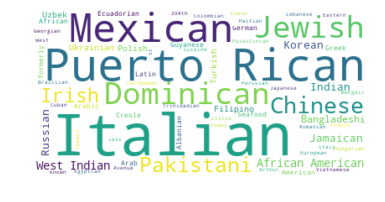

In [110]:
#visualizing the cloud
plt.imshow(ny_cuisine, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

## Use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan.

In [111]:
#At the beggining we created a dataframe containing borough, neighborhoods and coodrinates.
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [112]:
neighborhoods['Borough'].value_counts().to_frame()

,Borough
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40


In [113]:
neigh_MB = neighborhoods.loc[(neighborhoods['Borough'] == 'Brooklyn')|(neighborhoods['Borough'] == 'Manhattan')]
neigh_MB = neigh_MB.reset_index(drop=True)
neigh_MB.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [114]:
neigh_MB['Borough'].value_counts()

Brooklyn     70
Manhattan    40
Name: Borough, dtype: int64

In [115]:
#get the coordinates of New York City
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [116]:
#Visualize Brooklyn and Manhattan using Folium

# create map of Toronto using latitude and longitude values
MB_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neigh_MB['Latitude'], neigh_MB['Longitude'], neigh_MB['Borough'], neigh_MB['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(MB_map)  
    
MB_map

#### Foursquare credentials

In [117]:
# The code was removed by Watson Studio for sharing.

#### Analyze each neighborhoodin Manhattan and Brooklyn

In [118]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [119]:
MB_venues = getNearbyVenues(names=neigh_MB['Neighborhood'],
                                  latitudes=neigh_MB['Latitude'],
                                  longitudes=neigh_MB['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(MB_venues['Venue Category']),
      len(MB_venues['Venue Category'].unique())))


MB_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Loeser's Delicatessen,40.879242,-73.905471,Sandwich Place


In [120]:
MB_venues.shape

(9689, 7)

## Methodology <a name="methodology"></a>

In the first step we collected data about New York City:
1. Demographics data.
2. Boroughs, neighborhoods, and preffered food.
3. Available markets for supplies.
4. determinied that the preferred food in the city is Italian.

Second step is to analyze the collected data and define:
1. Use foursquare API to fetch the number of restaurants in Manhattan and Brooklyn boroughs.
2. The market saturation for restaurant business for Manhattan and Brooklyn boroughs. 
3. Confirm that the preferred food is Italian (since it is for the whole city).
4. Use Kmeans to cluster the restaurants.
4. Pinpoint the most appropriate neighborhood or area to open a traditional Balkan food restaurant.

## Analysis <a name="analysis"></a>

### Analyze the gathered data

#### Using word cloud analyze the preferred data in Manhattan

In [121]:
mh_data = df_cuisine[df_cuisine['Borough'] == 'Manhattan'].reset_index(drop=True)
mh_cuisine_wc = mh_data[['Cuisine']]
mh_cuisine_wc

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian
4,"Italian, African-American, Latin American, We..."
5,Korean
6,Italian
7,"Puerto Rican, Jewish, Italian, and Latin Amer..."
8,"Indian, Pakistani and Bangladeshi"
9,"Dominican, Puerto Rican, Italian and Jewish"


In [122]:
mh_cuisine_wc.to_csv('mh_cuisine.txt', sep=',', index=False)
mh_cuisine_file = open('mh_cuisine.txt', 'r').read()
stopwords = set(STOPWORDS)

In [123]:
#instantiate cloud object
mh_obj = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)
mh_obj.generate(mh_cuisine_file)

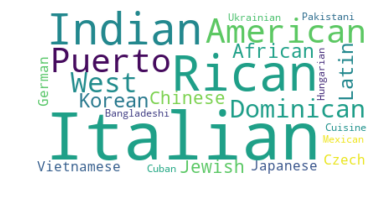

In [124]:
#visualize
plt.imshow(mh_obj, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

#### Using word cloud analyze the preferred data in Brooklyn

In [125]:
br_data = df_cuisine[df_cuisine['Borough'] == 'Brooklyn'].reset_index(drop=True)
br_cuisine = br_data[['Cuisine']]
br_cuisine

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,"African-American, Jamaican, Trinidadian, Puer..."
2,"Italian, Chinese, Turkish, Russian, Mexican, ..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukr..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [126]:
br_cuisine.to_csv('br_cuisine.txt', sep = ',', index=False)
br_wc = open('br_cuisine.txt', 'r').read()
stopwords = set(STOPWORDS)
br_cuisine_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords)

br_cuisine_wc.generate(br_wc)

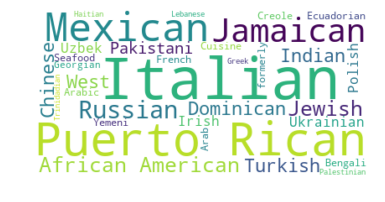

In [127]:
# display the word cloud
plt.imshow(br_cuisine_wc, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most preffered food in both boroughs is Italian.

#### Further analyze Manhattan and Brooklyn neighborhoods

In [128]:
MB_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Loeser's Delicatessen,40.879242,-73.905471,Sandwich Place


In [129]:
MB_venues.shape

(9689, 7)

In [130]:

colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
MB_venues = MB_venues[colnames]
MB_venues.columns = MB_venues.columns.str.replace(' ', '')
MB_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Loeser's Delicatessen,40.879242,-73.905471,Sandwich Place


In [131]:
MB_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 377
Coffee Shop                                 342
Italian Restaurant                          267
Bakery                                      221
Bar                                         214
Café                                        196
American Restaurant                         191
Park                                        184
Grocery Store                               165
Mexican Restaurant                          161
Chinese Restaurant                          157
Ice Cream Shop                              149
Sandwich Place                              147
Caribbean Restaurant                        144
Gym                                         143
Deli / Bodega                               138
Cocktail Bar                                136
Donut Shop                                  126
Gym / Fitness Center                        123
Wine Shop                                   123
Sushi Restaurant          

### Analyze each neighborhoods

In [132]:
# one hot encoding
MB_onehot = pd.get_dummies(MB_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(MB_onehot.columns)

# add neighborhood column back to dataframe
MB_onehot['Neighborhood'] = MB_venues['Neighborhood'] 

# move neighborhood column to the first column
MB_onehot = MB_onehot[column_names]

MB_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet St

#### Filter only restaurant data

In [133]:
restaurant_List = []
search = 'Restaurant'
for i in MB_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [134]:
restaurant_List

['African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Brazilian Restaurant',
 'Burmese Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
 'Jewish Restaurant',
 'Korean Restaurant',
 'Kosher Restaurant',
 'Latin American R

In [135]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
MB_restaurant = MB_onehot[col_name]
MB_restaurant = MB_restaurant.iloc[:,1::]

In [136]:
MB_restaurant_grouped = MB_restaurant.groupby('Neighborhood').sum().reset_index()


In [137]:
MB_restaurant_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Bath Beach,0,1,0,0,2,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,1
1,Battery Park City,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Bay Ridge,0,3,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,2,0,8,0,2,0,0,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,1
3,Bedford Stuyvesant,0,0,1,0,0,0,0,0,0,0,0,0,4,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Bensonhurst,0,1,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2
5,Bergen Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Boerum Hill,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,2
7,Borough Park,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Brighton Beach,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,2,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
9,Broadway Junction,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
MB_restaurant_grouped['Total'] = MB_restaurant_grouped .sum(axis=1)
MB_restaurant_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total
0,Bath Beach,0,1,0,0,2,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,1,32
1,Battery Park City,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
2,Bay Ridge,0,3,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,2,0,8,0,2,0,0,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,1,37
3,Bedford Stuyvesant,0,0,1,0,0,0,0,0,0,0,0,0,4,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
4,Bensonhurst,0,1,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,29


### Use kmeans to cluster neighborhoods and examine data.

In [139]:
# set number of clusters
kclusters = 3

MB_grouped_clustering = MB_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(MB_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1,
       1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1], dtype=int32)

In [140]:
MB_results = pd.DataFrame(kmeans.cluster_centers_)
MB_results.columns = MB_grouped_clustering.columns
MB_results.index = ['cluster0','cluster1','cluster2']
MB_results['Total Sum'] = MB_results.sum(axis = 1)
MB_results

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.037037,0.777778,0.000000,-2.775558e-17,0.148148,-1.387779e-17,-2.775558e-17,-1.734723e-18,-1.734723e-18,-6.938894e-18,6.938894e-18,3.703704e-02,1.481481,-6.938894e-18,0.814815,-1.734723e-18,1.387779e-17,0.037037,-3.469447e-18,-1.387779e-17,0.000000,-3.469447e-18,6.938894e-18,-2.775558e-17,0.037037,1.037037,2.775558e-17,3.330669e-16,-2.775558e-17,-1.665335e-16,1.387779e-17,-6.938894e-18,6.938894e-18,0.148148,-6.938894e-18,0.518519,1.387779e-17,0.259259,1.387779e-17,0.037037,6.938894e-18,0.444444,1.387779e-17,1.387779e-17,0.111111,0.444444,0.111111,-3.469447e-18,1.387779e-17,0.111111,-3.469447e-18,-1.734723e-18,-1.734723e-18,0.074074,6.938894e-18,0.000000,0.518519,0.111111,0.518519,-3.469447e-18,-3.469447e-18,6.938894e-18,0.037037,0.222222,0.222222,0.222222,-1.734723e-18,-6.938894e-18,-3.469447e-18,0.000000,0.074074,6.938894e-18,0.037037,6.938894e-18,-1.734723e-18,0.037037,-3.469447e-18,-1.110223e-16,8.666667,17.333333
cluster1,0.121951,2.365854,0.170732,1.219512e-01,0.707317,1.219512e-01,9.756098e-02,-1.734723e-18,-1.734723e-18,4.878049e-02,4.878049e-02,1.463415e-01,1.390244,2.439024e-02,1.975610,-1.734723e-18,7.317073e-02,0.219512,2.439024e-02,1.463415e-01,0.073171,4.878049e-02,4.878049e-02,1.707317e-01,0.219512,0.292683,1.463415e-01,1.146341e+00,1.463415e-01,4.390244e-01,4.878049e-02,9.756098e-02,7.317073e-02,1.121951,9.756098e-02,3.463415,7.317073e-02,1.585366,1.463415e-01,0.609756,2.439024e-02,1.073171,1.219512e-01,1.219512e-01,0.780488,2.512195,0.414634,-3.469447e-18,1.219512e-01,0.878049,2.439024e-02,-1.734723e-18,2.439024e-02,0.170732,1.040834e-17,0.390244,0.756098,0.170732,1.243902,4.878049e-02,4.878049e-02,7.317073e-02,0.243902,0.512195,0.585366,1.512195,-1.734723e-18,7.317073e-02,2.439024e-02,0.512195,1.097561,7.317073e-02,0.243902,7.317073e-02,2.439024e-02,0.707317,4.878049e-02,5.609756e-01,33.146341,66.292683
cluster2,0.023810,1.738095,0.047619,4.761905e-02,0.500000,7.142857e-02,7.142857e-02,2.380952e-02,2.380952e-02,4.761905e-02,2.380952e-02,1.387779e-17,1.119048,7.142857e-02,1.285714,2.380952e-02,7.142857e-02,0.214286,2.380952e-02,4.761905e-02,0.238095,-3.469447e-18,2.380952e-02,9.523810e-02,0.214286,0.738095,9.523810e-02,9.523810e-01,1.190476e-01,3.095238e-01,9.523810e-02,-6.938894e-18,6.938894e-18,0.285714,-6.938894e-18,2.642857,7.142857e-02,1.119048,1.387779e-17,0.095238,4.761905e-02,0.404762,2.380952e-02,2.775558e-17,0.333333,1.095

The total Sum of cluster2 has the smallest value. That means that the market is not oversaturated.

#### Create a dataframe with Neighborhoods, Cluster and Total sum.

In [141]:
MB_results_merged = pd.DataFrame(MB_restaurant_grouped['Neighborhood'])

MB_results_merged['Total'] = MB_restaurant_grouped['Total']
MB_results_merged = MB_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [142]:
MB_results_merged.head()

,Neighborhood,Total,Cluster_Labels
0,Bath Beach,32,1
1,Battery Park City,7,0
2,Bay Ridge,37,1
3,Bedford Stuyvesant,20,2
4,Bensonhurst,29,1


In [143]:
MB_merged = neigh_MB
MB_merged = MB_merged.join(MB_results_merged.set_index('Neighborhood'), on='Neighborhood')
MB_merged.head(10)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,12,0
1,Brooklyn,Bay Ridge,40.625801,-74.030621,37,1
2,Brooklyn,Bensonhurst,40.611009,-73.995180,29,1
3,Brooklyn,Sunset Park,40.645103,-74.010316,41,1
4,Brooklyn,Greenpoint,40.730201,-73.954241,22,2
5,Brooklyn,Gravesend,40.595260,-73.973471,9,0
6,Brooklyn,Brighton Beach,40.576825,-73.965094,21,2
7,Brooklyn,Sheepshead Bay,40.586890,-73.943186,33,1
8,Brooklyn,Manhattan Terrace,40.614433,-73.957438,20,2
9,Brooklyn,Flatbush,40.636326,-73.958401,32,1


#### Visualize the resulting clusters

In [144]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MB_merged['Latitude'], MB_merged['Longitude'], MB_merged['Neighborhood'], MB_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Finally make a list of the neighborhoods of the three clusters

In [145]:
#Cluster 0
MB_merged[MB_merged['Cluster_Labels'] == 0].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,12,0
1,Brooklyn,Gravesend,40.595260,-73.973471,9,0
2,Brooklyn,East Flatbush,40.641718,-73.936103,7,0
3,Brooklyn,Brownsville,40.663950,-73.910235,11,0
4,Brooklyn,Red Hook,40.676253,-74.012759,10,0
5,Brooklyn,Cypress Hills,40.682391,-73.876616,11,0
6,Brooklyn,East New York,40.669926,-73.880699,4,0
7,Brooklyn,Starrett City,40.647589,-73.879370,8,0
8,Brooklyn,Canarsie,40.635564,-73.902093,7,0
9,Brooklyn,Flatlands,40.630446,-73.929113,12,0


In [146]:
#Cluster 1
MB_merged[MB_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Brooklyn,Bay Ridge,40.625801,-74.030621,37,1
1,Brooklyn,Bensonhurst,40.611009,-73.995180,29,1
2,Brooklyn,Sunset Park,40.645103,-74.010316,41,1
3,Brooklyn,Sheepshead Bay,40.586890,-73.943186,33,1
4,Brooklyn,Flatbush,40.636326,-73.958401,32,1
5,Brooklyn,Prospect Heights,40.676822,-73.964859,30,1
6,Brooklyn,Williamsburg,40.707144,-73.958115,33,1
7,Brooklyn,Fort Greene,40.688527,-73.972906,28,1
8,Brooklyn,Bath Beach,40.599519,-73.998752,32,1
9,Brooklyn,Clinton Hill,40.693229,-73.967843,38,1


In [147]:
#Cluster 2
MB_merged[MB_merged['Cluster_Labels'] == 2].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Brooklyn,Greenpoint,40.730201,-73.954241,22,2
1,Brooklyn,Brighton Beach,40.576825,-73.965094,21,2
2,Brooklyn,Manhattan Terrace,40.614433,-73.957438,20,2
3,Brooklyn,Crown Heights,40.670829,-73.943291,20,2
4,Brooklyn,Kensington,40.642382,-73.980421,23,2
5,Brooklyn,Windsor Terrace,40.656946,-73.980073,22,2
6,Brooklyn,Bushwick,40.698116,-73.925258,24,2
7,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,20,2
8,Brooklyn,Brooklyn Heights,40.695864,-73.993782,22,2
9,Brooklyn,Cobble Hill,40.687920,-73.998561,23,2


In [148]:
MB_merged[MB_merged['Total'] == 0].reset_index(drop=True)


,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels


## Results and Discussion <a name="results"></a>

The analysis shows that the market is fairly saturated. There is not much room for opening new restaurant unless it has something
special to it. Offering a traditional Balkan food restaurant might have success, since there aren't many restaurants like that in Manhattan and Brooklyn boroughs.

## Conclusion <a name="conclusion"></a>

Starting a new business by opening a new Balkan food restaurant either in Mahattan or Brooklyn is a big risk, considering those boroughs are highly saturates with restaurants and most people prefer Italian food. If a decision is made to open a restaurant in those areas it should be in neighborhoods that belong to cluster2.
Further analysis of other New York City boroughs should be done in order to find the best place to open a new restaurant in New York. 